In [18]:
import matplotlib.pyplot as plt
import time
import pytimber
import math
import numpy as np
import pandas as pd
%matplotlib inline 
#notebook or inline 

In [2]:
ldb = pytimber.LoggingDB(source="nxcals")

In [3]:
print(ldb.search("EA.%"))

['EA.FREQPROG-SD:FIRST_SAMPLE_TIME', 'EA.FREQPROG-SD:SAMPLES', 'EA.FREQPROG-SD:SAMPLING_TRAIN', 'EA.FREQPROG-SD:TIME_UNIT_FACTOR', 'EA.FREV-SD:FIRST_SAMPLE_TIME', 'EA.FREV-SD:SAMPLES', 'EA.FREV-SD:SAMPLING_TRAIN', 'EA.FREV-SD:TIME_UNIT_FACTOR', 'EA.RPOS-SD:FIRST_SAMPLE_TIME', 'EA.RPOS-SD:SAMPLES', 'EA.RPOS-SD:SAMPLING_TRAIN', 'EA.RPOS-SD:TIME_UNIT_FACTOR', 'EA.TFB-B1-AQN.AQ', 'EA.TFB-B1-AQN.CCVA', 'EA.TFB-B1-CCV.AQ', 'EA.TFB-B1-CCV.CCVA', 'EA.TFB-B2-AQN.AQ', 'EA.TFB-B2-AQN.CCVA', 'EA.TFB-B2-CCV.AQ', 'EA.TFB-B2-CCV.CCVA', 'EA.TFB-B3-AQN.AQ', 'EA.TFB-B3-AQN.CCVA', 'EA.TFB-B3-CCV.AQ', 'EA.TFB-B3-CCV.CCVA', 'EA.TFB-B4-AQN.AQ', 'EA.TFB-B4-AQN.CCVA', 'EA.TFB-B4-CCV.AQ', 'EA.TFB-B4-CCV.CCVA', 'EA.TFB-B5-AQN.AQ', 'EA.TFB-B5-AQN.CCVA', 'EA.TFB-B6-AQN.AQ', 'EA.TFB-B6-AQN.CCVA', 'EA.TFB-B7-AQN.AQ', 'EA.TFB-B7-AQN.CCVA', 'EA.TFB-B8-AQN.AQ', 'EA.TFB-B8-AQN.CCVA', 'EA.TFB-PU41G-H.AQ', 'EA.TFB-PU41G-H.CCVA', 'EA.TFB-PU41G-H.OFFS2', 'EA.TFB-PU41G-H.SCAL2', 'EA.TFB-PU41G-V.AQ', 'EA.TFB-PU41G-V.CCVA', '

### NormData = (RawData - OffsetData) x nSamples x CalibrationFactor/gain

In [131]:
t1 = '2021-08-26 09:30:00.000'
t2 = '2021-08-26 11:00:00.000'
data = ldb.get("EA.XSEC:Acquisition:semNormData", t1, t2)
print (data)

{'EA.XSEC:Acquisition:semNormData': (array([1.62996300e+09, 1.62996300e+09, 1.62996300e+09, ...,
       1.62996726e+09, 1.62996726e+09, 1.62996726e+09]), array([[ 3.45000000e+06, -4.02502413e+06, -0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.45000000e+06, -4.02502413e+06, -0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.45000000e+06, -4.02502413e+06, -0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.19878800e+11,  4.19843610e+11,  9.47154900e+11, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.19878800e+11,  4.19843610e+11,  9.47154900e+11, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.19878800e+11,  4.19843610e+11,  9.47154900e+11, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]))}


### semNormdata has two arrays. First one is time in seconds and second is an array of array containing 128 elements

In [132]:
data["EA.XSEC:Acquisition:semNormData"]

(array([1.62996300e+09, 1.62996300e+09, 1.62996300e+09, ...,
        1.62996726e+09, 1.62996726e+09, 1.62996726e+09]),
 array([[ 3.45000000e+06, -4.02502413e+06, -0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 3.45000000e+06, -4.02502413e+06, -0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 3.45000000e+06, -4.02502413e+06, -0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 4.19878800e+11,  4.19843610e+11,  9.47154900e+11, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 4.19878800e+11,  4.19843610e+11,  9.47154900e+11, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 4.19878800e+11,  4.19843610e+11,  9.47154900e+11, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]))

In [134]:
#ldb.tree

In [141]:
time = pd.to_datetime(data['EA.XSEC:Acquisition:semNormData'][0], unit = "s")
print (time[0])

2021-08-26 07:30:00.305238272


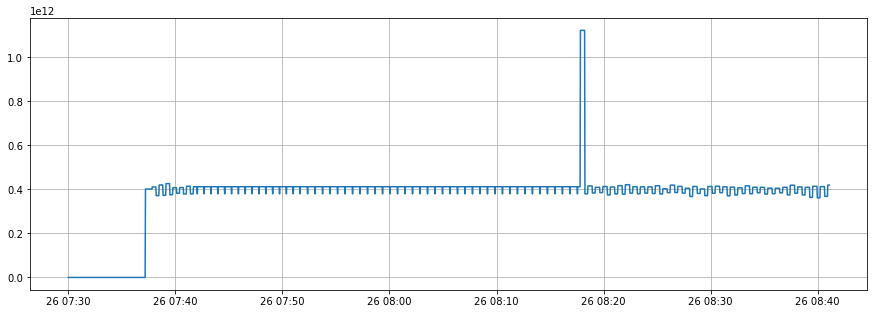

In [140]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(time, data["EA.XSEC:Acquisition:semNormData"][1][:,0])
ax.grid()

plt.show()